In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from xml.etree import ElementTree
from matplotlib import  pyplot as plt

In [2]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras import datasets, layers, models


In [3]:
class_names = ['person','person-like']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

n_classes = 2
size = (200,200)

In [4]:
def load_data():
    datasets = ['Train/Train', 'Test/Test', 'Val/Val']
    output = []

    for dataset in datasets:
        imags = []
        labels = []
        directoryA = "./" + dataset +"/Annotations"
        directoryIMG = "./" + dataset +"/JPEGImages/"
        file = os.listdir(directoryA)
        img = os.listdir(directoryIMG)
        file.sort()
        img.sort()

        i = 0
        for xml in file:

            xmlf = os.path.join(directoryA,xml)
            dom = ElementTree.parse(xmlf)
            vb = dom.findall('object')
            label = vb[0].find('name').text
            labels.append(class_names_label[label])

            img_path = directoryIMG + img[i]
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            imags.append(curr_img)
            i +=1
        
        imags = np.array(imags, dtype='float32')
        imags = imags / 255
        
      #  labels = pd.DataFrame(labels)
        labels = np.array(labels, dtype='int32')

        output.append((imags, labels))
    return output


In [5]:
(train_images, train_labels),(test_images, test_labels),(val_images, val_labels) = load_data()

In [6]:
values, counts=np.unique(train_labels,return_counts=True)
print(counts)

[533 411]


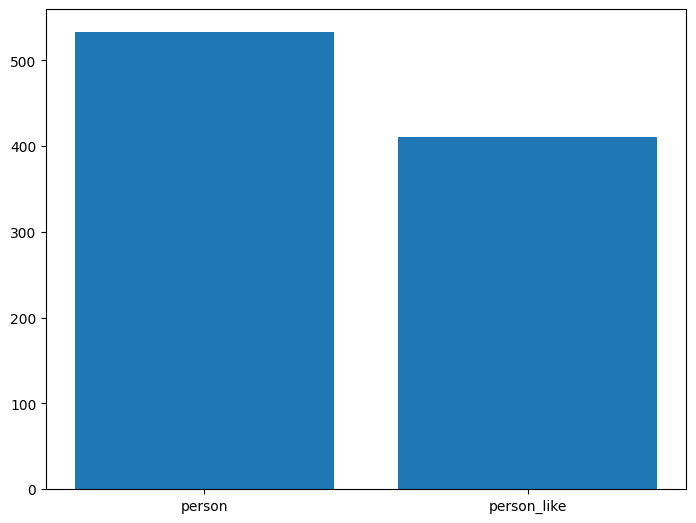

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lab = ['person','person_like']
values = [533,411]
ax.bar(lab,values)
plt.show()

In [8]:
train_images.shape

(944, 200, 200, 3)

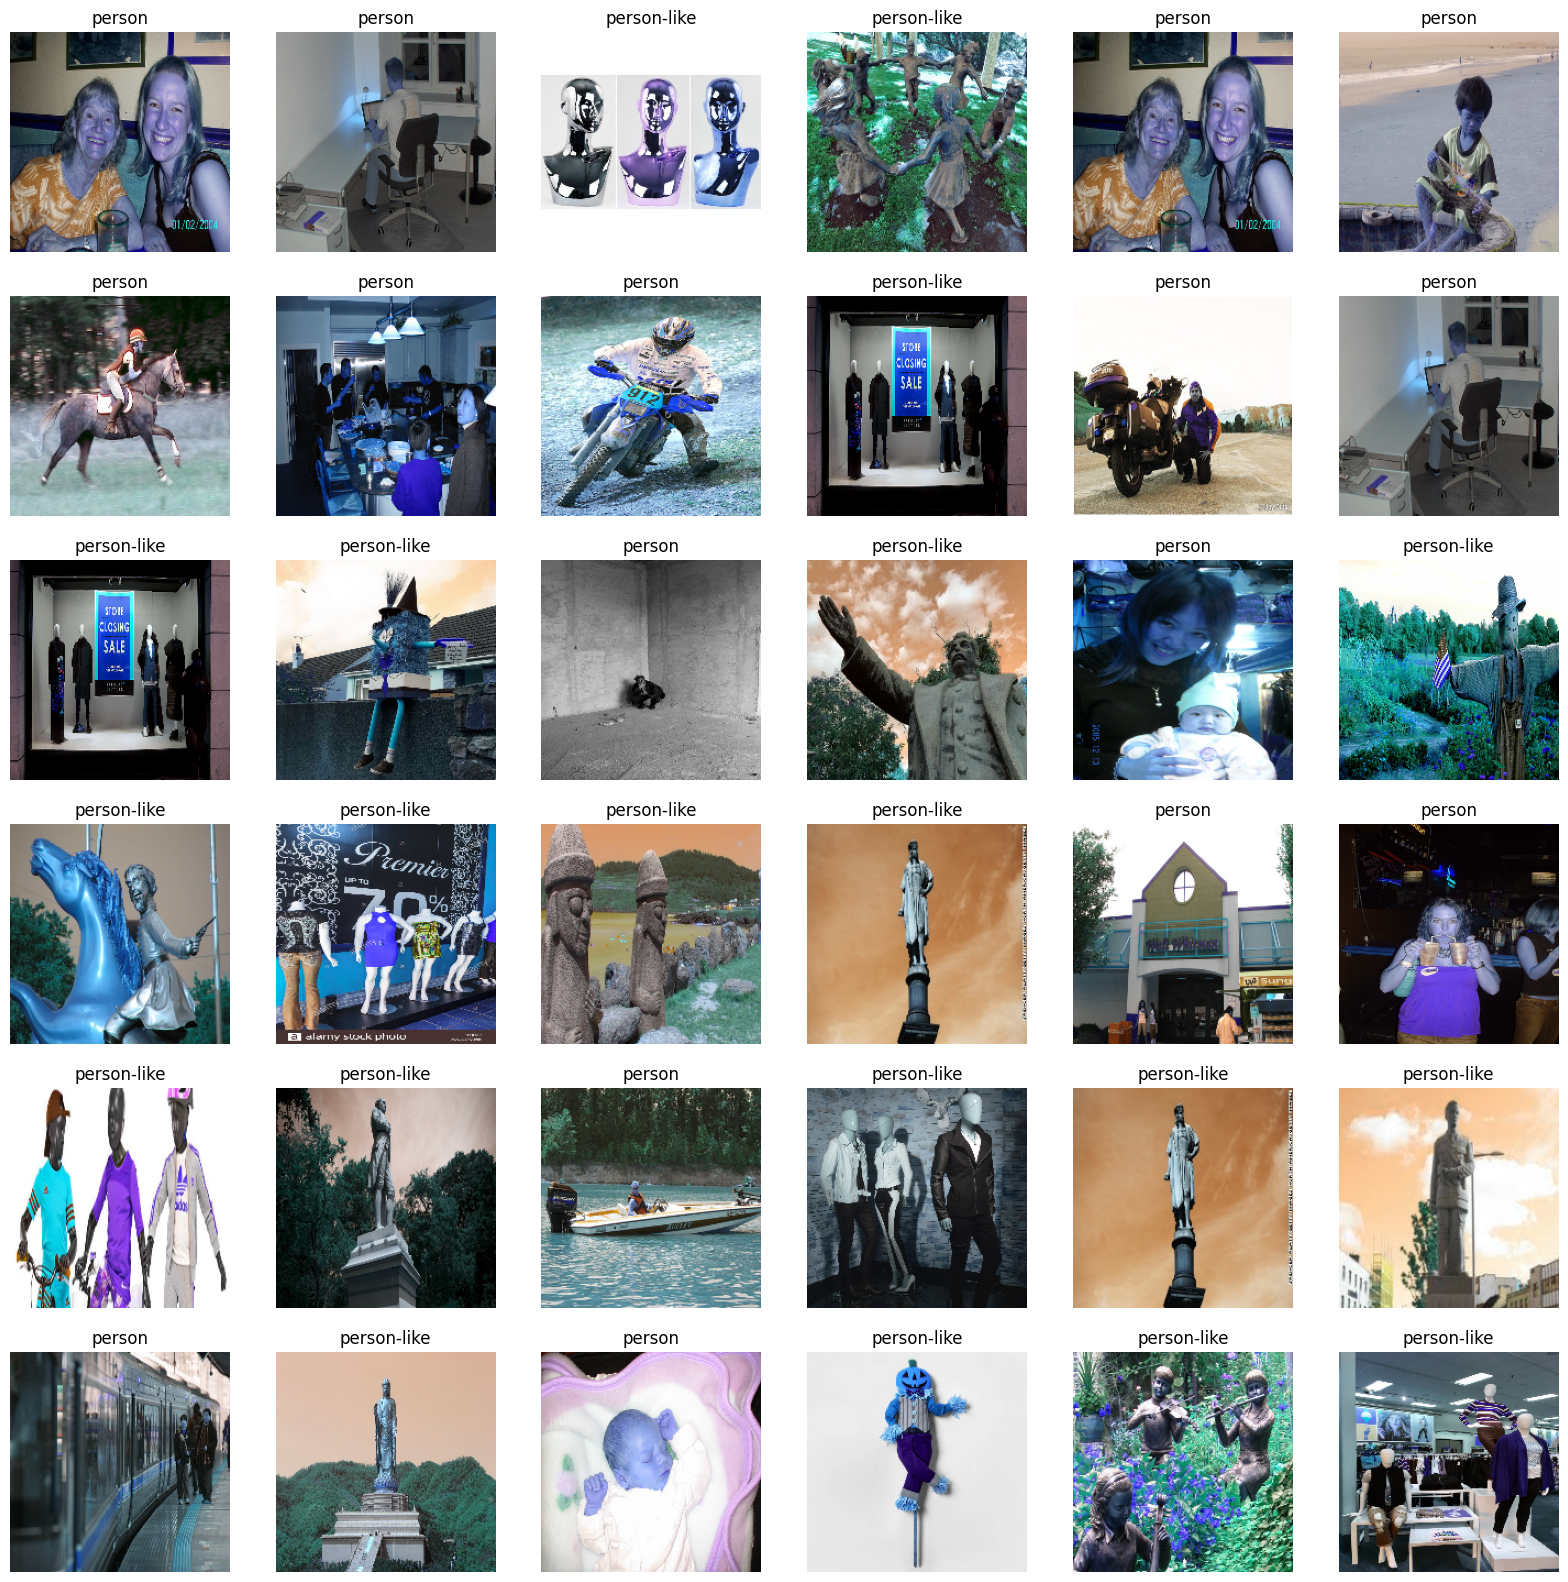

In [9]:
plt.figure(figsize=(20,20))

for n,i in enumerate(list(np.random.randint(0,len(train_images),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(train_images[i])  
    plt.title(class_names[train_labels[i]])
    plt.axis('off')

In [10]:
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [45]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 198, 198, 8)       224       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 99, 99, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 97, 97, 16)        1168      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 48, 48, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 46, 46, 32)        4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 23, 23, 32)       

In [47]:
train_images.shape


(944, 200, 200, 3)

In [48]:
history = model.fit(train_images, train_labels, epochs=8, batch_size=1,
                    validation_data=(test_images, test_labels))

Epoch 1/8
944/944 [==============================] - 57s 58ms/step - loss: 0.7169 - accuracy: 0.5657 - val_loss: 0.6411 - val_accuracy: 0.5787
Epoch 2/8
944/944 [==============================] - 54s 57ms/step - loss: 0.6473 - accuracy: 0.6176 - val_loss: 0.6237 - val_accuracy: 0.6723
Epoch 3/8
944/944 [==============================] - 66s 70ms/step - loss: 0.6157 - accuracy: 0.6949 - val_loss: 0.6642 - val_accuracy: 0.5745
Epoch 4/8
944/944 [==============================] - 69s 73ms/step - loss: 0.5500 - accuracy: 0.7320 - val_loss: 0.9299 - val_accuracy: 0.6553
Epoch 5/8
944/944 [==============================] - 70s 74ms/step - loss: 0.4721 - accuracy: 0.7924 - val_loss: 0.6349 - val_accuracy: 0.6979
Epoch 6/8
944/944 [==============================] - 74s 79ms/step - loss: 0.3320 - accuracy: 0.8697 - val_loss: 0.8012 - val_accuracy: 0.6851
Epoch 7/8
944/944 [==============================] - 61s 65ms/step - loss: 0.1958 - accuracy: 0.9248 - val_loss: 0.9909 - val_accuracy: 0.6936

In [49]:

fle_s='Pedestrian_Detection3.h5'
model.save(fle_s)


C:\Users\Maitri Savla\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
test_images.shape

(235, 200, 200, 3)

In [51]:
model.evaluate(test_images, test_labels,batch_size=1)

235/235 [==============================] - 3s 13ms/step - loss: 0.9914 - accuracy: 0.6936


[0.9914289712905884, 0.693617045879364]

In [52]:
pred = model.predict(test_images,batch_size=1)

235/235 [==============================] - 4s 14ms/step


In [53]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

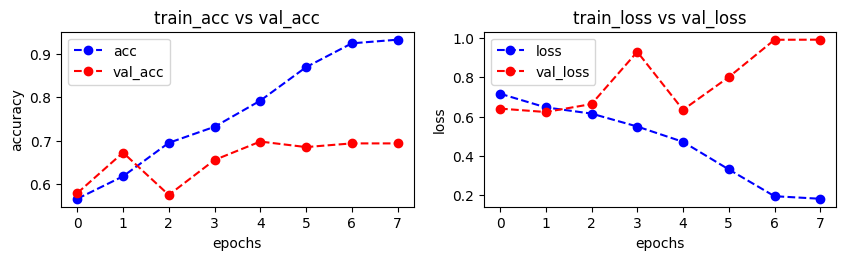

In [54]:
plot_accuracy_loss(history)

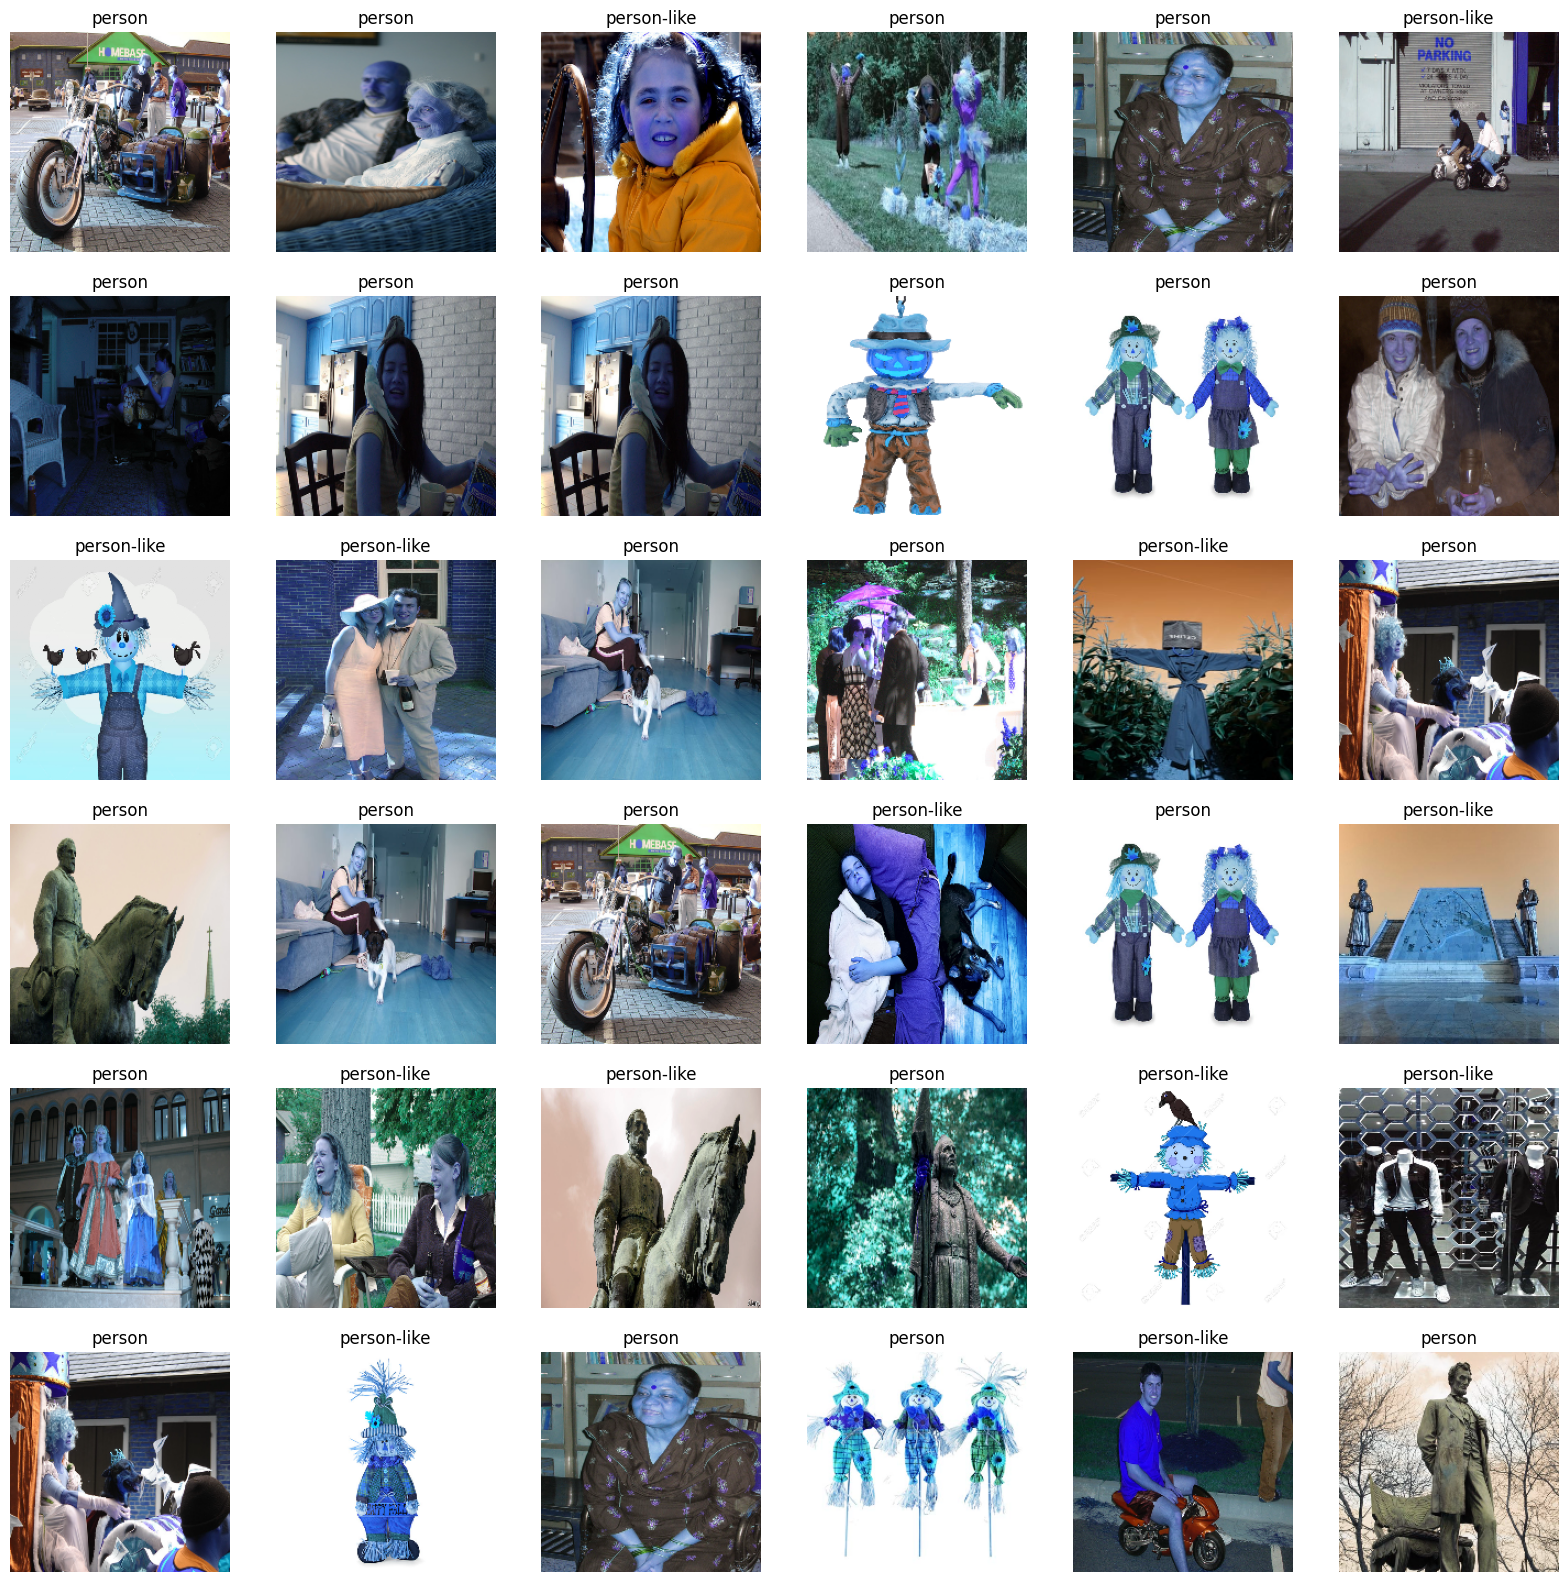

In [55]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(val_images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(val_images[i])    
    plt.axis('off')
    x =np.argmax(pred[i]) # takes the maximum of of the 6 probabilites. 
    plt.title((class_names[x]))

In [56]:
result = []
for i in range(len(pred)):
    result.append(np.argmax(pred[i]))

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
report=classification_report(test_labels,result)

In [59]:
print(report)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       136
           1       0.64      0.62      0.63        99

    accuracy                           0.69       235
   macro avg       0.69      0.68      0.68       235
weighted avg       0.69      0.69      0.69       235



In [60]:
results = confusion_matrix(test_labels, result)

<Axes: >

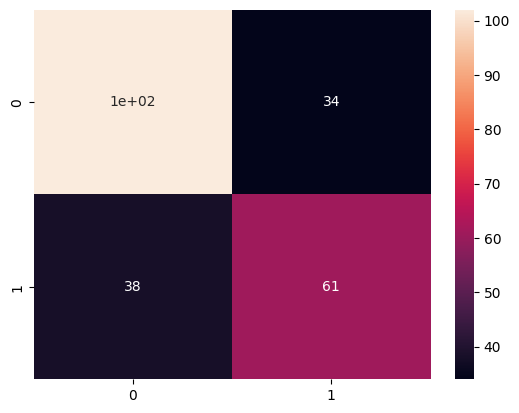

In [61]:
import seaborn as sns
sns.heatmap(results,annot=True)